## Project 2

In [1]:
%matplotlib inline
import numpy as np
import scipy as sc
import numpy.linalg as la
from scipy.misc import imread
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

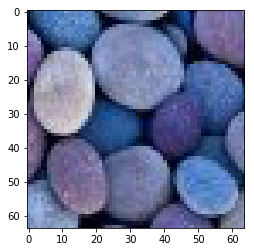

In [2]:
img = imread('stones_rgb.jpg')
plt.imshow(img);

In [3]:
h = len(img)  # number of rows
n = h*h
r = 2
sigma = 10.0
L = np.array([
    [ 0.299   ,  0.587  ,  0.114  ],
    [-0.14713 , -0.28886,  0.436  ],
    [ 0.615   , -0.51499, -0.10001],
])

def sim(i, j):
    '''
    Return the similarity between two pixels at single indices i and j.
    
    Index i is translated to x, y coordinates with the following formula:
    i = x + y*h
    '''
    xi = i%h
    yi = (i - xi)//h
    xj = j%h
    yj = (j - xj)//h
    if i == j or abs(xi - xj) > r or abs(yi - yj) > r:
        return 0
    ci = img[xi, yi]
    cj = img[xj, yj]
    diff = ci - cj
    weighted_norm_sq = np.sum(np.dot(L, diff)**2)
    return np.exp(-weighted_norm_sq/(2*sigma*sigma))

In [4]:
# Construct W
W = np.zeros((n, n), dtype='float64')
for i in range(n):
    for j in range(i + 1, n):
        W[i, j] = sim(i, j)
# construct a symmetric matrix where upper triangle is non-negative
# and lower triangle is zero.
W = np.maximum(W, W.T)

In [5]:
# Construct L
D = np.sum(W, axis=1)  # don't need the whole matrix explicitly.
D_inv_sqroot = 1/np.sqrt(D)
L = D_inv_sqroot[:, np.newaxis]*W*D_inv_sqroot

In [6]:
# find the first k eigenvectors of L
k = 5
Q, _ = la.qr(np.random.randn(n, k))
# simultaneous iteration
for i in range(500):
    Q, _ = la.qr(np.dot(L, Q))

In [7]:
V = D_inv_sqroot[:, np.newaxis]*Q

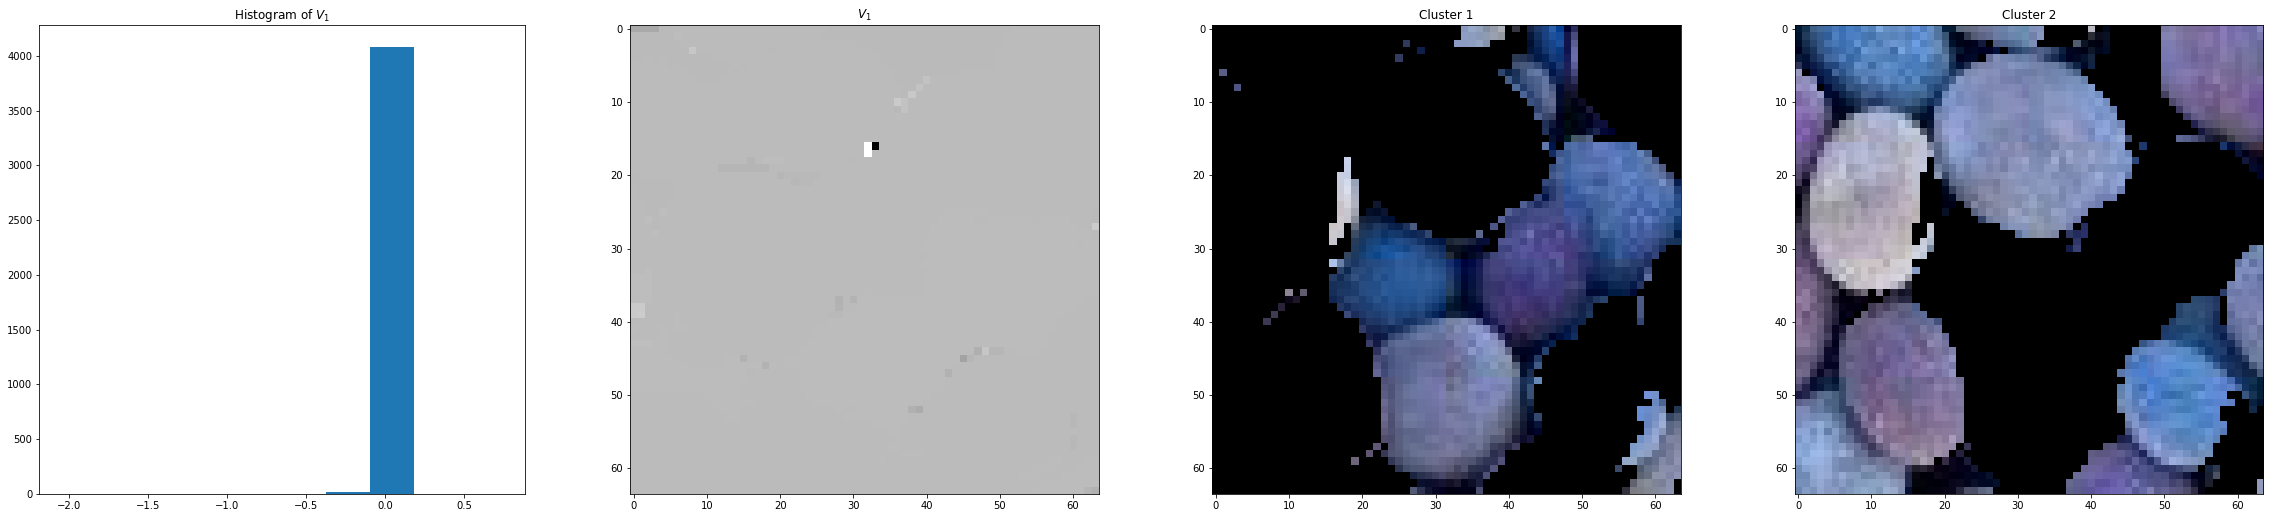

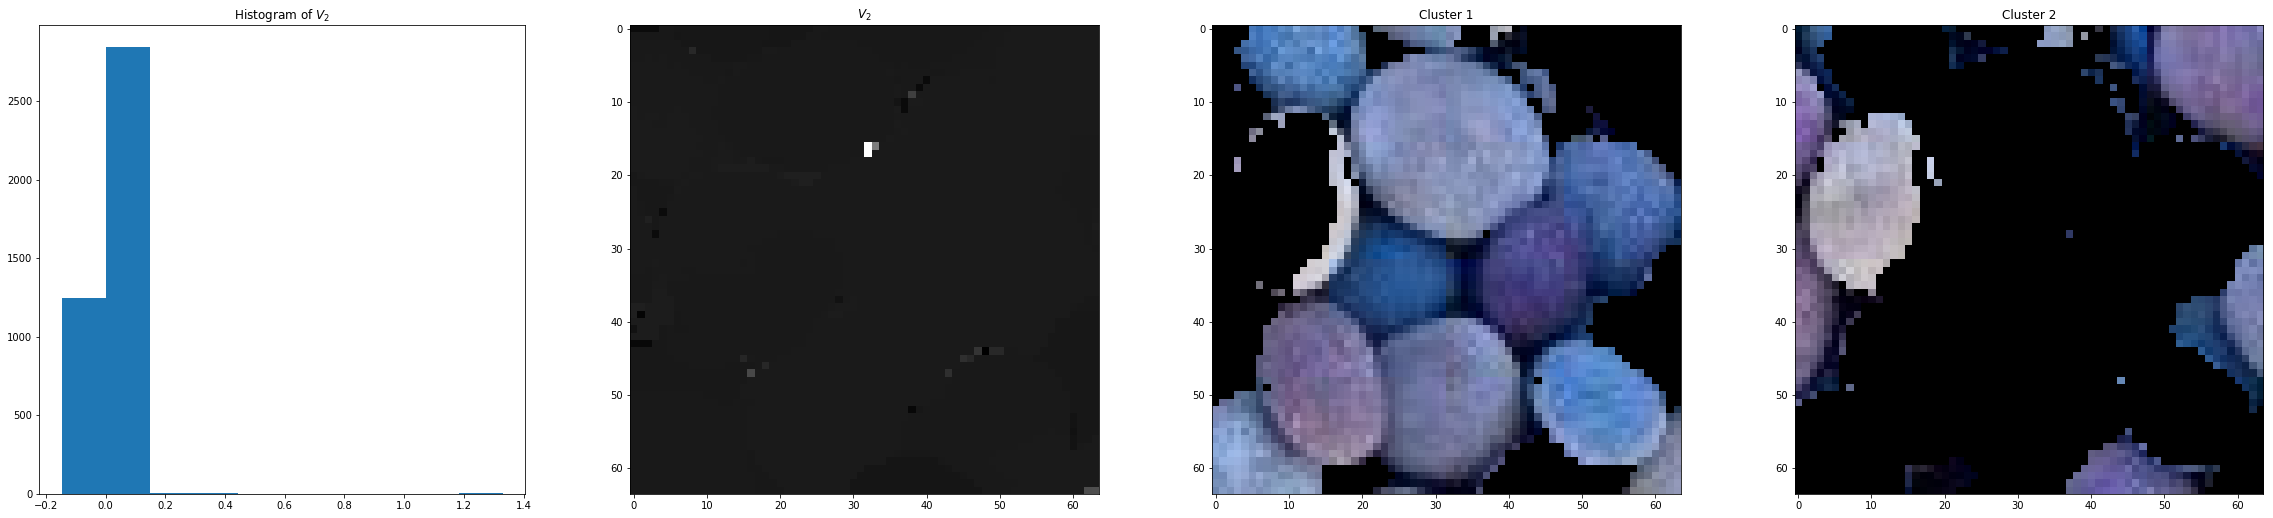

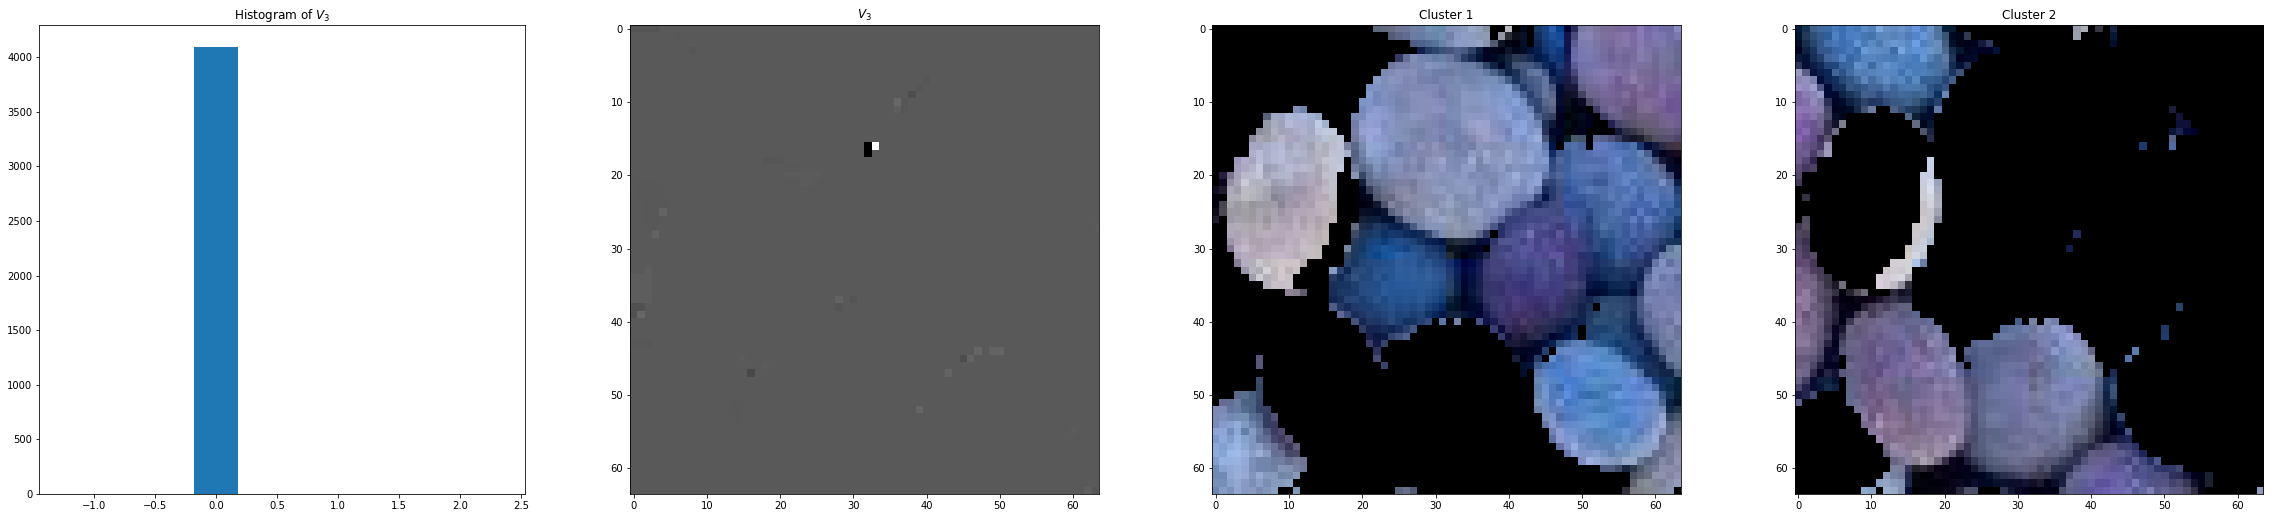

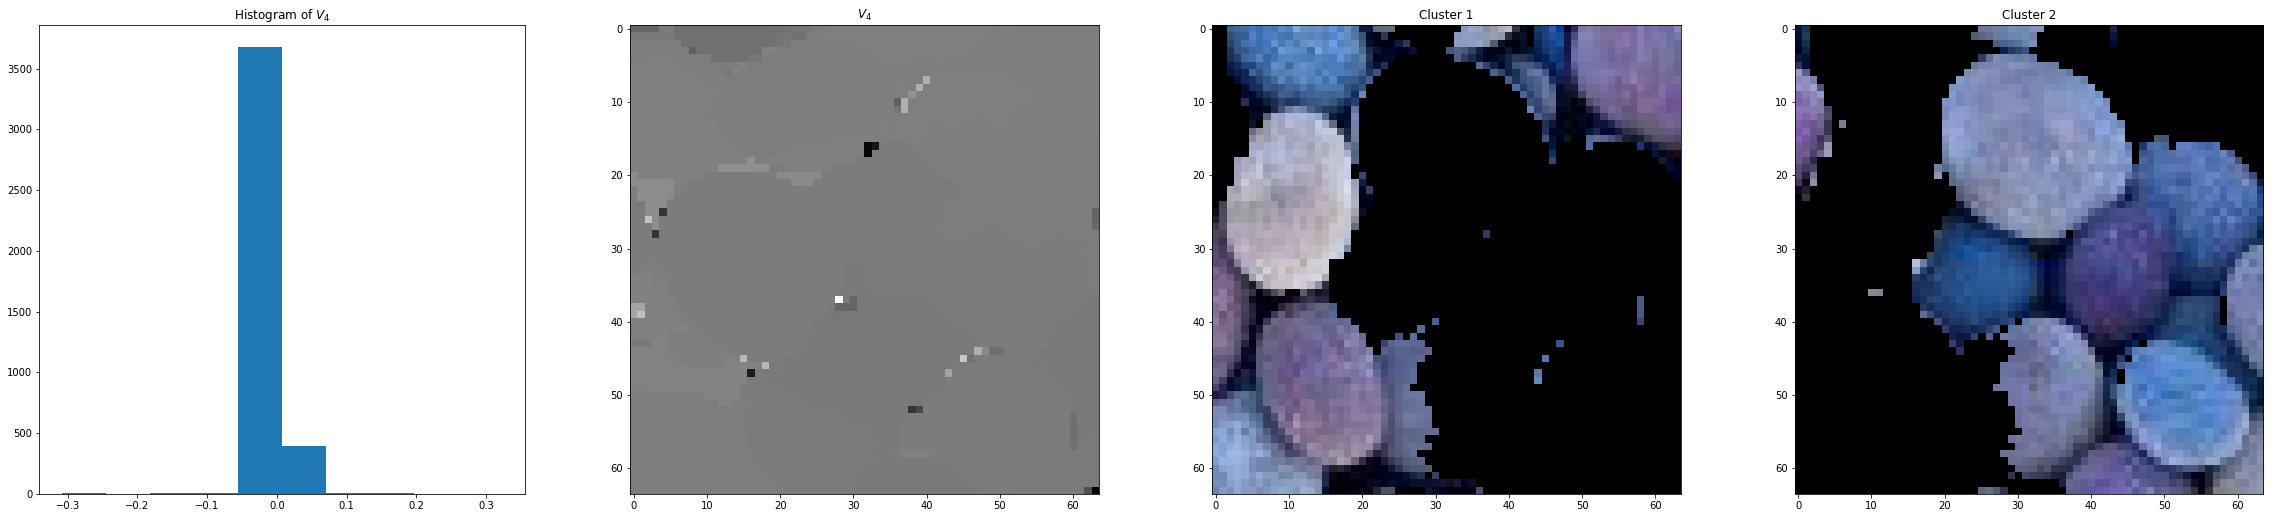

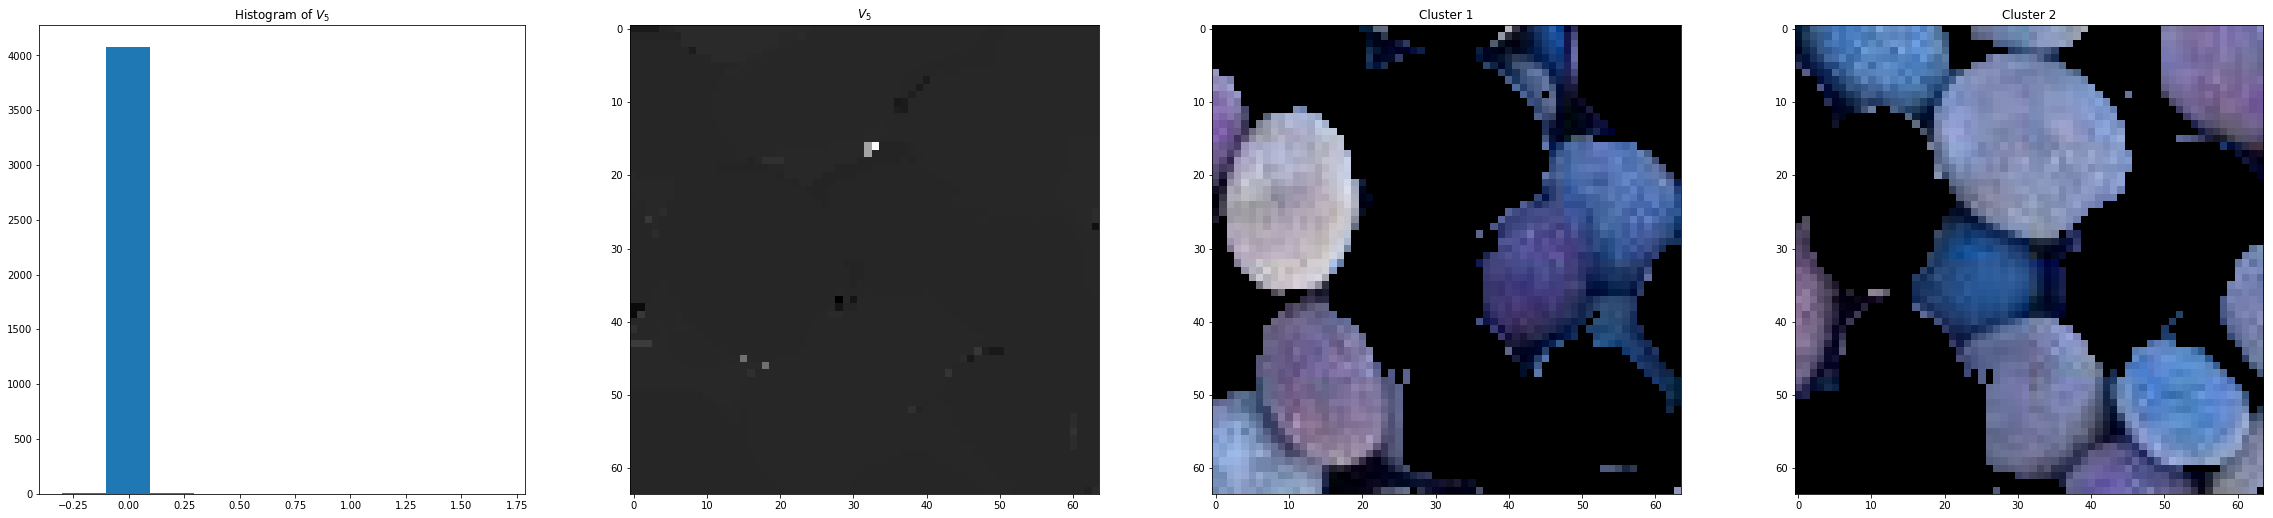

In [8]:
# draw histograms and clusters
cols = 4
for i in range(k):
    plt.figure(figsize=(40, 50))  # adjust the image size to your preference.
    v = V[:, i]
    plt.subplot(k, cols, i*cols + 1)
    plt.hist(v)
    plt.title(r'Histogram of $V_{}$'.format(i + 1))
    plt.subplot(k, cols, i*cols + 2)
    plt.imshow(v.reshape(h, h), cmap='gray')
    plt.title(r'$V_{}$'.format(i + 1))
    cluster1 = img.copy()
    cluster2 = img.copy()
    for x in range(h):
        for y in range(h):
            if v[x + y*h] < 0:
                cluster1[x, y] = 0
            else:
                cluster2[x, y] = 0
    plt.subplot(k, cols, i*cols + 3)
    plt.imshow(cluster1)
    plt.title('Cluster 1')
    plt.subplot(k, cols, i*cols + 4)
    plt.imshow(cluster2)
    plt.title('Cluster 2')
    plt.show()

In [9]:
# image segmentation via k-means clustering
norms = la.norm(V, axis=1)
V_normalized = V/norms[:, np.newaxis]
kmeans = KMeans(n_clusters=20)
labels = kmeans.fit_predict(V_normalized)

In [10]:
segments = np.empty((h, h), dtype='float')
for x in range(h):
    for y in range(h):
        segments[x, y] = labels[x + y*h]*10/255  # imshow wants numbers in [0, 1]

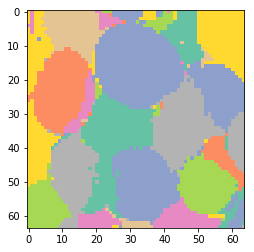

In [11]:
plt.imshow(segments, cmap='Set2');